## Classificação com Machine Learning


### Projeto de Classificação de Sucesso Musical (Spotify Hits & Flops) 

Este projeto foca no desenvolvimento de **modelos de classificação** capazes de prever se uma faixa musical, com base em suas características técnicas, será um **"Hit"** (Sucesso) ou um **"Flop"** (Não-Sucesso/Não-Popular) no contexto do *mainstream*.


### Objetivo e Contexto

Utilizaremos um *dataset* exclusivo, obtido através da **Web API do Spotify**, que contém diversas *features* (características) para cada faixa, como **dançabilidade**, **energia**, **valência**, **tempo**, entre outras. Cada faixa está rotulada como **'1' (Hit)** ou **'0' (Flop)**, seguindo critérios definidos pelo autor do *dataset* para indicar sua provável popularidade.

É crucial notar que a etiqueta **'Flop'** não implica que a música seja de qualidade inferior ou um fracasso objetivo, mas sim que **provavelmente não alcançaria popularidade generalizada** no *mainstream*.



### Metodologia

Nosso trabalho consistirá em:

1.  **Análise Exploratória de Dados (EDA)** para compreender a distribuição das *features* entre as classes 'Hit' e 'Flop'.
2.  **Pré-processamento de Dados** para preparar as *features* para o treinamento do modelo.
3.  **Treinamento e Avaliação** de diferentes algoritmos de classificação (como Regressão Logística, Random Forest, SVM, etc.) para identificar qual deles oferece o melhor desempenho na distinção entre *hits* e *flops*.



### Relevância

A capacidade de prever o potencial de sucesso de uma música é de grande interesse para a **indústria musical** (gravadoras, *DJs* e artistas), auxiliando na tomada de decisões estratégicas sobre produção, marketing e *playlisting*. Este projeto visa não apenas criar um modelo preditivo robusto, mas também **identificar quais características técnicas do Spotify são os preditores mais fortes** do sucesso musical.

## **Setup**

In [53]:
#Data Wranling 
import pandas as pd 
import numpy as np 
import os
import joblib

#Data visualizatin 
import matplotlib.pyplot as plt 
import seaborn as sns 

#KFold
from sklearn.model_selection import KFold, cross_val_score 

#Model selection e pipelines
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

#Normalization 
from sklearn.preprocessing import MinMaxScaler

#Classification 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

#Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc 


#Remove warning 
import warnings


In [2]:
# Ignora todos os warnings
warnings.filterwarnings('ignore')



### Data

In [3]:
#Load data 
df_90 = pd.read_csv('..\Data\Raw\dataset-of-90s.csv')
df_00 = pd.read_csv('..\Data\Raw\dataset-of-00s.csv')
df_10 = pd.read_csv('..\Data\Raw\dataset-of-10s.csv')

In [4]:
#Concat datasets 
df = pd.concat([df_90,df_00,df_10])

In [5]:
#Visualizando primeiras linhas 
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0


In [6]:
#Infos gerais 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17790 entries, 0 to 6397
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             17790 non-null  object 
 1   artist            17790 non-null  object 
 2   uri               17790 non-null  object 
 3   danceability      17790 non-null  float64
 4   energy            17790 non-null  float64
 5   key               17790 non-null  int64  
 6   loudness          17790 non-null  float64
 7   mode              17790 non-null  int64  
 8   speechiness       17790 non-null  float64
 9   acousticness      17790 non-null  float64
 10  instrumentalness  17790 non-null  float64
 11  liveness          17790 non-null  float64
 12  valence           17790 non-null  float64
 13  tempo             17790 non-null  float64
 14  duration_ms       17790 non-null  int64  
 15  time_signature    17790 non-null  int64  
 16  chorus_hit        17790 non-null  float64
 17 

In [7]:
#Verificando nulos 
df.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [8]:
#Verificando dados duplicados 
df.duplicated().sum()

#Verificando linhas com dados duplicados 
df[df.duplicated()]

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
30,Someday,Sugar Ray,spotify:track:6NcHJ23mLQKnVxQcOmT7JW,0.743,0.670,1,-4.547,0,0.0293,0.010800,0.070200,0.2200,0.934,110.832,243333,4,25.36994,12,1
77,L.A. Song,Beth Hart,spotify:track:69pBTbnLue0leYUCMAFqPj,0.351,0.615,7,-7.621,1,0.0451,0.206000,0.000000,0.9850,0.337,127.798,271107,3,58.57055,10,1
188,Steam,Ty Herndon,spotify:track:2sPXJCnKyQ1SWjc2JdFnQK,0.676,0.738,6,-6.693,1,0.0262,0.049700,0.000003,0.0784,0.697,101.944,216693,4,21.42116,12,1
206,Sexual (Li Da Di),Amber,spotify:track:4jCWcK6PhbnzOCAFJEztUm,0.623,0.898,4,-6.604,0,0.0309,0.000192,0.303000,0.1380,0.786,130.993,226227,4,30.76970,12,1
220,I Need To Know,Marc Anthony,spotify:track:7ffwRz8lZyDOE4Vj58Lo72,0.813,0.949,3,-2.563,0,0.0336,0.486000,0.000010,0.1120,0.792,115.061,227707,4,31.46063,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5902,Fearless,Taylor Swift,spotify:track:6Eu31gddWw0gOGO506pJYA,0.594,0.712,5,-4.418,1,0.0273,0.040000,0.000000,0.3090,0.476,99.972,241987,4,20.97568,12,1
5929,I Wanna Make You Close Your Eyes,Dierks Bentley,spotify:track:0V6Na986SNXm1CpreVF56E,0.599,0.610,1,-5.745,1,0.0232,0.104000,0.000048,0.1150,0.359,95.979,239119,4,33.35001,10,1
6081,Life After You,Daughtry,spotify:track:70NGpcNvhI2hqonWNAETIu,0.396,0.796,5,-3.253,1,0.0357,0.059700,0.000000,0.4070,0.362,154.037,207213,3,63.75813,9,1
6112,Live Like We're Dying,Kris Allen,spotify:track:1HfxPaJggVwFsvOtHbVzMz,0.589,0.893,0,-2.948,1,0.0397,0.027300,0.000000,0.3430,0.940,92.011,212507,4,35.05636,10,1


In [9]:
#Top 5 hits 
df.groupby(['artist','track']).size().sort_values(ascending = False).head(5)

artist              track                             
Julee Cruise        Falling                               12
Stefano Patarnello  Chebika - Claudio Mate Metal Remix     8
Todd Terry          Feeling Punk - Asle Remix              6
Arvo Pärt           Spiegel im Spiegel                     5
Story Of The Year   Until the Day I Die                    5
dtype: int64

In [10]:
#Removendo duplicatas 
df = df.drop_duplicates(subset=['track','artist'])

In [11]:
#Dimensão dos dados 
df.shape

(17362, 19)

In [12]:
#Proporção target
df['target'].value_counts(normalize = True) * 100

target
1    50.224628
0    49.775372
Name: proportion, dtype: float64

### Features

In [13]:
#Tipos de dados 
df.dtypes

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
dtype: object

In [14]:
#Infos descritivas 
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,17362.000000,1.736200e+04,17362.000000,17362.000000,17362.000000,17362.000000
mean,0.559860,0.655534,5.269036,-8.368586,0.652632,0.088807,0.240249,0.157978,0.196683,0.485989,121.053226,2.494776e+05,3.923050,40.964088,10.795473,0.502246
std,0.187469,0.246079,3.563331,5.302304,0.476148,0.092832,0.307832,0.308222,0.167195,0.255124,29.909889,1.119149e+05,0.378197,19.964160,4.744401,0.500009
min,0.057600,0.000251,0.000000,-49.253000,0.000000,0.022000,0.000000,0.000000,0.013000,0.000000,34.535000,1.592000e+04,0.000000,0.000000,1.000000,0.000000
25%,0.438000,0.505000,2.000000,-9.919000,0.000000,0.035700,0.009080,0.000000,0.093800,0.278250,97.149000,1.997632e+05,4.000000,27.902563,8.000000,0.000000
50%,0.577000,0.699000,5.000000,-6.913500,1.000000,0.050400,0.082700,0.000044,0.128000,0.487000,119.876000,2.331265e+05,4.000000,36.271890,10.000000,1.000000
75%,0.697000,0.856000,8.000000,-5.036000,1.000000,0.096700,0.378750,0.058800,0.257000,0.690000,140.003000,2.763132e+05,4.000000,48.324433,12.000000,1.000000
max,0.986000,0.999000,11.000000,1.137000,1.000000,0.956000,0.996000,0.998000,0.992000,0.996000,217.872000,4.170227e+06,5.000000,262.615400,169.000000,1.000000


In [15]:
#Correlação
num_cols = df.select_dtypes(include='number')
corr = num_cols.corr()

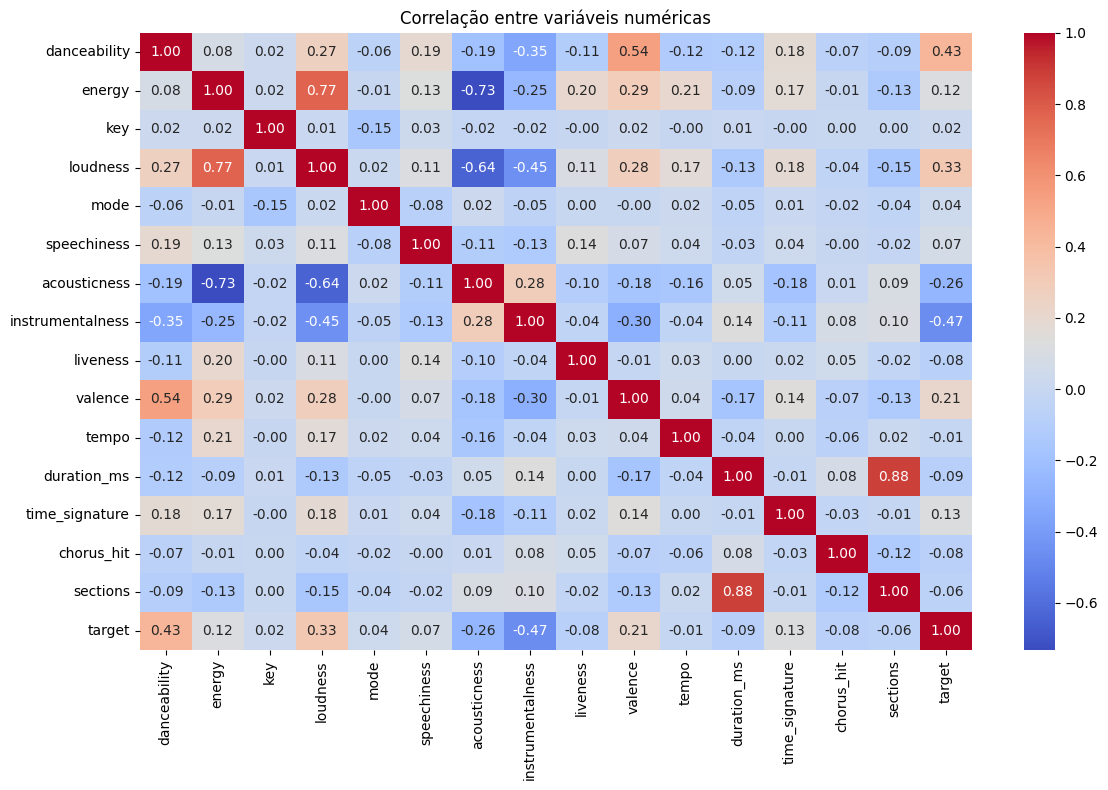

In [16]:
#Heatmap
fig = plt.figure(figsize=([12,8]))
sns.heatmap(corr, annot = True, cbar = True, cmap = 'coolwarm', fmt = '.2f')

#Título e eixos 
plt.title('Correlação entre variáveis numéricas')
plt.tight_layout()
plt.show()

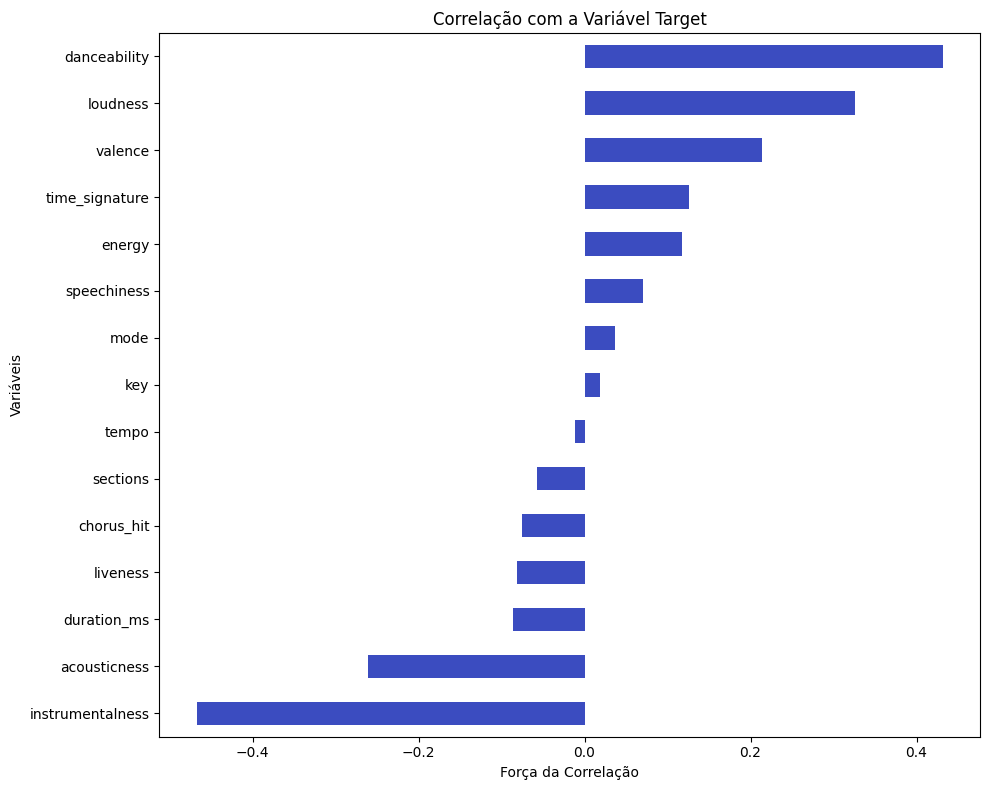

In [17]:
#Selecionando apenas coluna e remove a correlação com a mesma
target_corr = corr['target'].drop('target').sort_values()

#Gráfico de barras horizontal
plt.figure(figsize=(10, 8))
target_corr.plot(kind='barh', cmap='coolwarm') 

#Título e eixos
plt.title('Correlação com a Variável Target')
plt.xlabel('Força da Correlação')
plt.ylabel('Variáveis')
plt.tight_layout()
plt.show()

### Análise de Correlação e seleção de Features

Nossa análise de correlação e de features foi um ótimo diagnóstico, com ela conseguimos revelar três grupos de *features*:

#### 1. Iremos remover as features `liveness`, `tempo` e `speechiness`

- Enquanto a análise se concentrou nas *features* com correlações fortes (positivas ou negativas), o gráfico também expôs um grupo de *features* **irrelevantes**, as que irão ser removidas.

* `liveness`, `tempo`, `key` e `mode` têm barras quase inexistentes, com uma correlação próxima de zero. Elas não têm, estatisticamente, uma relação linear com o fato de uma música ser "Hit" ou "Flop".
* `speechiness` e `sections` também são extremamente fracas.

**Ação a ser feita:**
Com isso vamos optar por remover essas *features* porque elas são clasificadas como **"ruído"**.

**Justificativa:** Manter *features* irrelevantes (ruído) no modelo é prejudicial. Elas aumentam o tempo de treinamento, aumentam a complexidade e podem levar ao *overfitting* (o modelo pode começar a encontrar padrões falsos nelas). Ao removê-las, forçamos o modelo posterior a ser escolhido a focar seu poder de decisão apenas nas *features* que realmente importam.

#### 2. Manter `instrumentalness` e adicionar `is_vocal_track`:

**O Diagnóstico:**
A análise de `instrumentalness` (-0.47) foi perfeita. Conseguimos concluir que "Este é o fator mais negativo... **A presença de vocais é essencial**".

**O Problema (O Ponto Cego):**
Ao modelar um modelo posteriormente, o mesmo poderá sofrer quando `instrumentalness` for quase zero (ou seja, quando os vocais estão presentes). O modelo poderá saber o que fazer com uma música instrumental, mas ao mesmo tempo ficar "confuso" quando ela tiver vocais.

**A Ação:**
A nova *feature* `is_vocal_track` transforma este *insight* ("vocais são essenciais") em uma coluna explícita.

**Justificativa:** Em vez de forçar o modelo a "adivinhar" que `instrumentalness = 0` significa "tem vocal", nós damos a ele uma *flag* clara (`is_vocal_track = 1`). Isso permite ao modelo criar regras de decisão muito mais inteligentes, como: "SE `is_vocal_track` = 1, ENTÃO foque na `danceability` e `loudness` para decidir se é um hit".

#### 3. Manter `danceability`, `loudness`, `energy` e `acousticness`

**O Diagnóstico:**
A análise identificou estas features como as "alavancas" mais fortes:
* `danceability` (0.43) e `loudness` (0.32) são os principais preditores positivos.
* `acousticness` (-0.26) é o segundo principal preditor negativo (depois de `instrumentalness`).

**Ação:**
Iremos manter porque elas são a base do poder preditivo do modelo.


### Conclusão

Após toda a analise de correlação e verificação de features impactantes para o modelo, iremos nos basear nelas para separação das features para o treinamento dos modelos:



### Seleção de Features e separação dos dados 

In [18]:
#Criando 'flag' para ajudar o modelo a tomada de decisões
df['is_vocal_track'] = (df['instrumentalness'] < 0.01).astype(int)

#Dropando features de baixa importância 
features_to_drop = [
    'track', 'artist', 'uri', 'target', 
    'liveness', 'tempo', 'speechiness'  
]

In [ ]:
#Salvando o df limpo em Processed

os.makedirs('../Data/Processed', exist_ok=True) 
df.to_parquet('../Data/Processed/spotify_hits_limpo.parquet', index=False)


DataFrame processado salvo em: ../Data/Processed/spotify_hits_limpo.parquet


In [19]:
X = df.drop(features_to_drop, axis = 1, errors = 'ignore')
y = df['target']

In [20]:
#Treinando o modelo 
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

#Dimensão de treino e teste 
print(f'Treino:', X_train.shape)
print(f'Teste:', X_test.shape)


Treino: (13889, 13)
Teste: (3473, 13)


### Normalização

In [21]:
#MinMaxScaler 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Transformando novamente em df
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

### Modelagem

#### Regressão Logística

In [22]:
from sklearn.linear_model import LogisticRegression

#Aplicando o modelo de Regressão Logística
model = LogisticRegression(random_state= 42)
model.fit(X_train,y_train)

#Predição do modelo 
y_pred = model.predict(X_test)

#Métricas de avaliação do modelo 
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Acurácia: 0.80
              precision    recall  f1-score   support

           0       0.85      0.71      0.78      1719
           1       0.76      0.88      0.81      1754

    accuracy                           0.80      3473
   macro avg       0.81      0.80      0.80      3473
weighted avg       0.80      0.80      0.80      3473



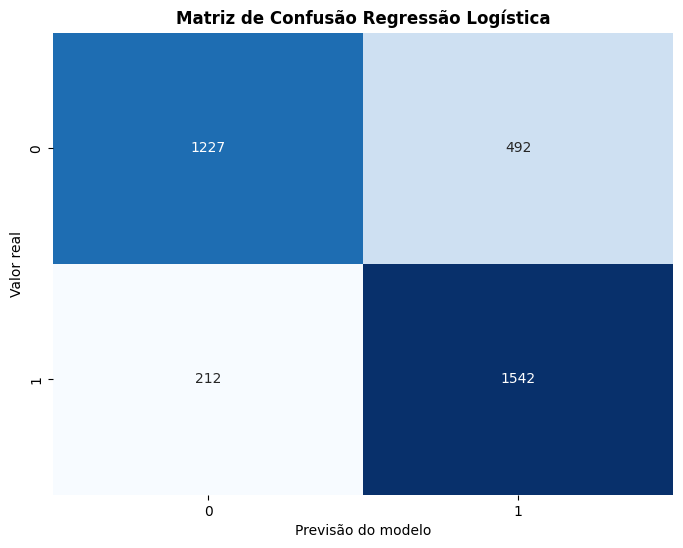

In [23]:
#Matriz confusão 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False )

#Título e eixos 
plt.title('Matriz de Confusão Regressão Logística', fontweight = 'bold')
plt.xlabel('Previsão do modelo')
plt.ylabel('Valor real')
plt.show()

#### Análise:


O modelo de Regressão Logística apresentou um desempenho geral sólido, com uma acurácia de 79.7% (2769 acertos de 3473 previsões).

Principal Força (Alto Recall): O modelo é excelente em identificar os "Hits" (Classe 1). Ele encontrou corretamente 1542 hits e deixou de identificar apenas 212 (Falsos Negativos). Isso representa um Recall de 87.9% para a classe 1 (1542 / (1542 + 212)).

Principal Fraqueza: A fraqueza do modelo é  o número de Falsos Positivos. Ele classificou incorretamente 492 músicas como "Hits".


#### K-NN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
#KNN model
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)

#Predição do moelo
y_pred = knn_model.predict(X_test)

#Métricas de avaliação do modelo 
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Acurácia: 0.79
              precision    recall  f1-score   support

           0       0.83      0.73      0.78      1719
           1       0.76      0.85      0.81      1754

    accuracy                           0.79      3473
   macro avg       0.80      0.79      0.79      3473
weighted avg       0.80      0.79      0.79      3473



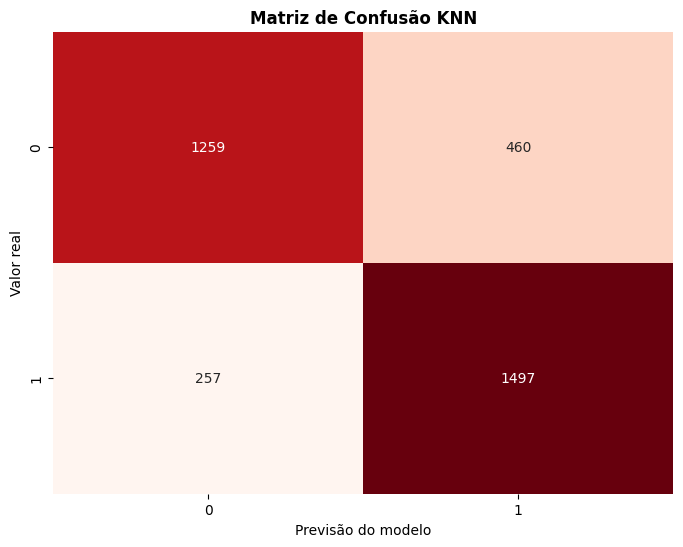

In [25]:
#Matriz confusão 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False )

#Título e eixos 
plt.title('Matriz de Confusão KNN', fontweight = 'bold')
plt.xlabel('Previsão do modelo')
plt.ylabel('Valor real')
plt.show()

#### Análise:

O modelo KNN com seleção de features apresentou um desempenho bom, com uma acurácia de 79.4% (2756 acertos de 3473 previsões).

Principal Força (Recall Alto): O modelo se identificou muito eficaz em encontrar os "Hits" (Classe 1). Ele identificou corretamente 1497 hits e deixou de identificar 257 (Falsos Negativos), com um excelente Recall de 85.4% (1497 / (1497 + 257)).

O modelo gerou apenas 460 Falsos Positivos. 


#### Árvore de Decisão

In [26]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth= 5)
model.fit(X_train, y_train)

#Predição do modelo 
y_pred = model.predict(X_test)

#Métricas de avaliação do modelo 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.80      1719
           1       0.79      0.85      0.82      1754

    accuracy                           0.81      3473
   macro avg       0.81      0.81      0.81      3473
weighted avg       0.81      0.81      0.81      3473



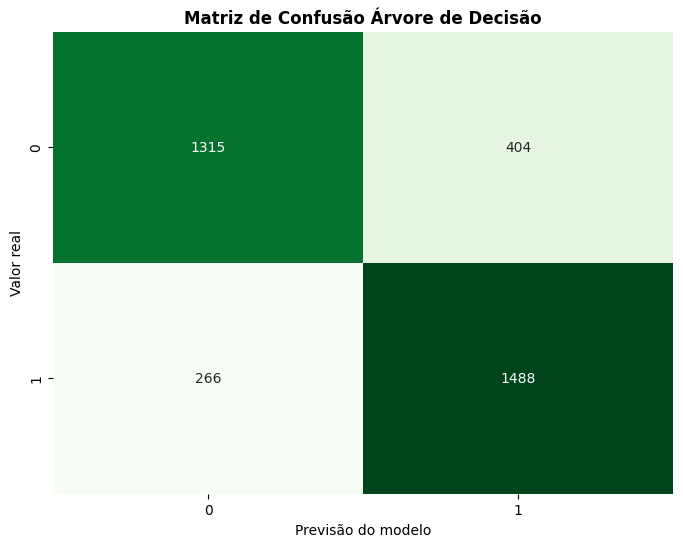

In [27]:
#Matriz de confusão 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False )

#Título e eixos 
plt.title('Matriz de Confusão Árvore de Decisão', fontweight = 'bold')
plt.xlabel('Previsão do modelo')
plt.ylabel('Valor real')
plt.show()

#### Análise:

O modelo de Árvore de Decisão apresentou um desempenho balanceado, com uma acurácia total de 80.7% (2803 acertos de 3473 previsões).

Principal Força (Alto Recall): O modelo se mostroy muito bom em identificar "Hits" (Classe 1). Ele encontrou corretamente 1488 hits e deixou de identificar 266 (Falsos Negativos), resultando em um Recall de 84.8% (1488 / (1488 + 266)).


#### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
#Definindo o modelo
model = RandomForestClassifier(n_estimators= 200, random_state= 42)
model.fit(X_train,y_train)

#Predição
y_pred = model.predict(X_test)

#Métricas de avaliação do modelo
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1719
           1       0.80      0.88      0.84      1754

    accuracy                           0.83      3473
   macro avg       0.84      0.83      0.83      3473
weighted avg       0.84      0.83      0.83      3473



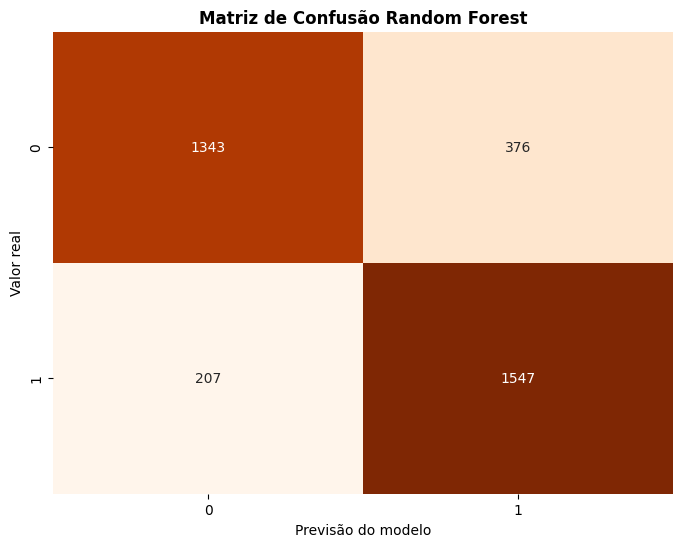

In [29]:
#Matriz de confusão 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False )

#Título e eixos 
plt.title('Matriz de Confusão Random Forest', fontweight = 'bold')
plt.xlabel('Previsão do modelo')
plt.ylabel('Valor real')
plt.show()


#### Análise:


O modelo de Random Forest apresentou o melhor desempenho geral até agora, com uma acurácia total de 83.2% (2890 acertos de 3473 previsões).

Principal Força (Melhor Recall): O modelo é o melhor em identificar "Hits" (Classe 1). Ele encontrou corretamente 1547 hits e deixou de identificar apenas 207 (Falsos Negativos). Isso resulta em um Recall de 88.2% (1547 / (1547 + 207)), o mais alto de todos os modelos testados até agora.

Ponto Forte (Alta Precisão): O modelo continua sendo um dos mais equilibrados. Ele gerou 376 Falsos Positivos (alarmes falsos), mantendo uma Precisão de 80.4% para a Classe 1 (1547 / (1547 + 376)).

Conclusão: O Random Forest confirma ser um modelo extremamente robusto e equilibrado. A remoção de features irrelevantes provavelmente não alterou seu desempenho, pois ele já sabe como ignorá-las. Até o momento ele é o campeão de Recall (melhor em encontrar hits) e um dos melhores em Precisão (evitar alarmes falsos).

#### Gradient Bosting 

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

#Definfindo o modelo
gb_model = GradientBoostingClassifier(random_state = 42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

#Métricas de avaliação
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1719
           1       0.80      0.89      0.84      1754

    accuracy                           0.83      3473
   macro avg       0.84      0.83      0.83      3473
weighted avg       0.84      0.83      0.83      3473



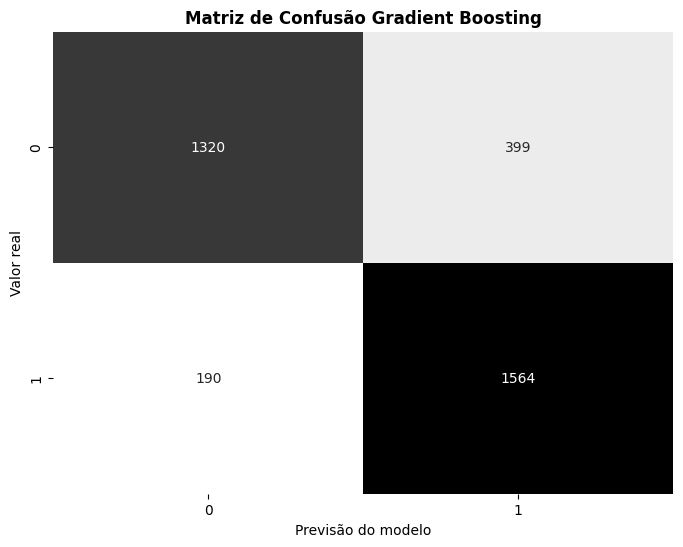

In [31]:
#Matriz de confusão 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys', cbar=False )

#Título e eixos 
plt.title('Matriz de Confusão Gradient Boosting', fontweight = 'bold')
plt.xlabel('Previsão do modelo')
plt.ylabel('Valor real')
plt.show()

#### Análise:

O modelo de Gradient Boosting (com seleção de features) se consolidou como o melhor modelo de baseline, atingindo a maior acurácia, com 83.04% (2884 acertos de 3473 previsões).

Principal Força (Melhor Recall da Categoria): Este modelo é o campeão em detectar "Hits" (Classe 1). Ele encontrou corretamente 1564 hits (Verdadeiros Positivos) e deixou de identificar apenas 190 (Falsos Negativos). Isso resulta em um Recall de 89.2% (1564 / (1564 + 190)), o mais alto de todos os modelos.

Desempenho Equilibrado: Ele gerou apenas 399 Falsos Positivos (FP).

Conclusão: O Gradient Boosting é o modelo mais forte e confiável até o momento. Ele vence o Random Forest tanto em Acurácia total (83.0% vs 83.2%) quanto em Recall (89.2% vs 88.2%), e agora tem o menor número de Falsos Negativos (190). Este é, sem dúvida, o modelo a ser levado para a etapa de tuning.

#### XGboost

In [ ]:


#Definindo o modelo 
xgb_model = xgb.XGBClassifier(
    random_state = 42,
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 4,
    n_jobs = -1,
    eval_metric = 'logloss',
    reg_alpha = 0,
    reg_lambda = 1    
)
   
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print(f'Métricas: {classification_report(y_test,y_pred)}')
    
    


Métricas:               precision    recall  f1-score   support

           0       0.88      0.77      0.82      1719
           1       0.80      0.90      0.84      1754

    accuracy                           0.83      3473
   macro avg       0.84      0.83      0.83      3473
weighted avg       0.84      0.83      0.83      3473



Text(70.72222222222221, 0.5, 'Valor real')

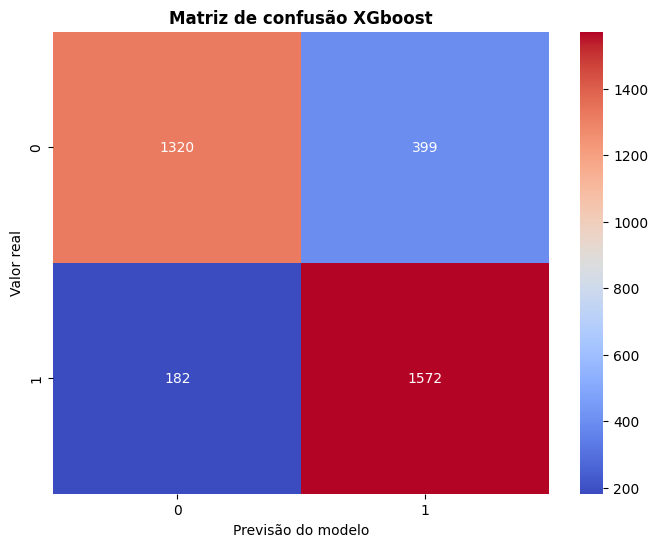

In [33]:
#Matriz de confusão 
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap= 'coolwarm')
plt.title('Matriz de confusão XGboost', fontweight = 'bold')
plt.xlabel('Previsão do modelo')
plt.ylabel('Valor real')


#### Análise:

O modelo de **XGBoost** apresentou o melhor desempenho geral, com uma acurácia total de **83.3%** (2892 acertos de 3473 previsões).

* **Principal Força (Melhor Recall e Menor Erro de Tipo II):** Este modelo é o **mais eficiente na detecção de "Hits"** (Classe 1). Ele encontrou corretamente **1572** hits (Verdadeiros Positivos) e deixou de identificar apenas **182** (Falsos Negativos). Isso resulta em um **Recall de 89.6%** (1572 / (1572 + 182)), o melhor de todo o *benchmark*.

* **Ponto Forte (Precisão Sólida):** O modelo gerou **399** Falsos Positivos (FP), resultando na melhor Precisão para a Classe 1 até agora, com **79.8%** (1572 / (1572 + 399)).

**Conclusão:**
O XGBoost se destaca como o **campeão geral do *benchmark***. Ele superou por pouco o Gradient Boosting, conseguindo identificar 8 "Hits" a mais sem aumentar o número de "alarmes falsos".

Esta performance, mesmo **com** as *features* de ruído (que ainda não removemos), confirma o foco em um modelo de *boosting* para a etapa de *tuning*.

### Rede Neural

In [34]:
from sklearn.neural_network import MLPClassifier

#Definindo o modelo 
mlp_model = MLPClassifier(random_state = 42)
mlp_model.fit(X_train, y_train)

#Predição 
y_pred = mlp_model.predict(X_test)

#Métricas para avaliação
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1719
           1       0.80      0.89      0.84      1754

    accuracy                           0.83      3473
   macro avg       0.84      0.83      0.83      3473
weighted avg       0.84      0.83      0.83      3473



Text(70.72222222222221, 0.5, 'Valor real')

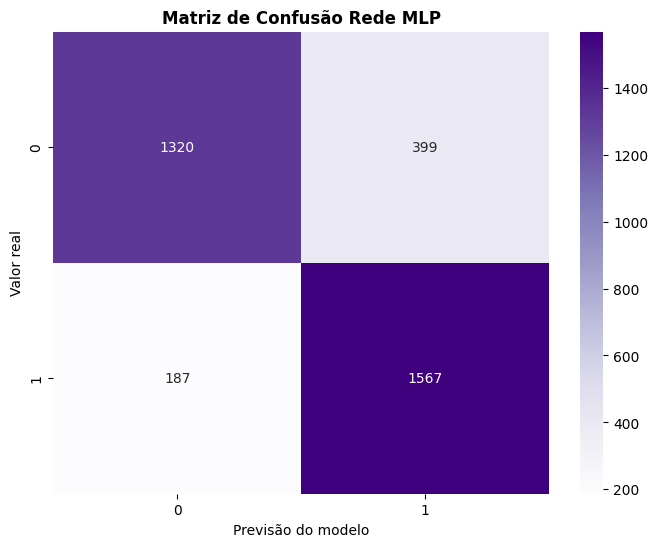

In [35]:
#Matriz de confusão 
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot = True, cmap = 'Purples', fmt = 'd')

#Título e eixxos 
plt.title('Matriz de Confusão Rede MLP', fontweight = 'bold')
plt.xlabel('Previsão do modelo')
plt.ylabel('Valor real')


### Comparando os modelos  com Cross Validation

In [36]:

#Definindo os modelos em um dicionário
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42), 
    'Random Forest': RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, max_depth=5, use_label_encoder=False, eval_metric='logloss'), 
    'MLP Classifier': MLPClassifier(random_state=42)
}

In [37]:
#Cross validation 
from sklearn.model_selection import cross_val_score

#Listas para adicionar os resultados
results_mean = []
results_std = []
results_names = []

for model_name, model in models.items():
    print(model_name)
    
    cv_scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')
    
    results_mean.append(cv_scores.mean())
    results_std.append(cv_scores.std())
    results_names.append(model_name)
    

Logistic Regression
KNN
Decision Tree
Random Forest
Gradient Boosting
XGBoost
MLP Classifier


In [38]:
#Transformando os resultados em df 
df_results = pd.DataFrame({
    'Modelo' : results_names,
    'Acurácia Média' : results_mean,
    'Acurácia Std' : results_std
})

df_results.sort_values(by = 'Acurácia Média', ascending = False)

,Modelo,Acurácia Média,Acurácia Std
4,Gradient Boosting,0.831594,0.007552
5,XGBoost,0.823386,0.008426
6,MLP Classifier,0.822378,0.005570
3,Random Forest,0.813234,0.008608
2,Decision Tree,0.802506,0.008976
0,Logistic Regression,0.796818,0.005982
1,KNN,0.790410,0.007932


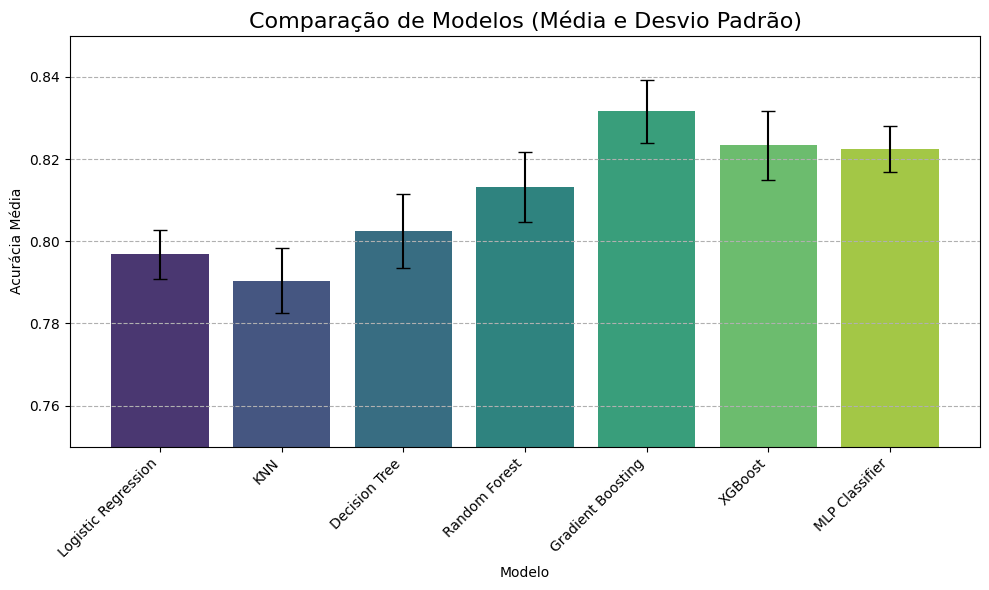

In [39]:
#Gráfico de barras comparando os modelos
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_results, 
    x='Modelo', 
    y='Acurácia Média', 
    palette="viridis" 
)

#Adicinando barra de erro
plt.errorbar(
    x=df_results['Modelo'], 
    y=df_results['Acurácia Média'], 
    yerr=df_results['Acurácia Std'], 
    fmt='none',      
    capsize=5, 
    color='black',   
    linewidth=1.5
)

#Ajuste dos limites do eixo Y
plt.ylim(0.75, 0.85)

#Eixos e títulos
plt.ylabel("Acurácia Média")
plt.xlabel("Modelo")
plt.title("Comparação de Modelos (Média e Desvio Padrão)", fontsize=16)
plt.xticks(rotation=45, ha='right') # Rotação para melhor leitura dos nomes
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Resumo dos modelos



#### Conclusão Geral e Decisão do Modelo

O objetivo desta fase foi realizar um *benchmark* rigoroso de 7 algoritmos de classificação para identificar o mais robusto e preciso para prever o sucesso de uma música.

A análise foi feita em duas partes:
1.  **Benchmark Rápido:** Avaliação de todos os 7 modelos em um único *split* de teste (80/20), analisando suas matrizes de confusão.
2.  **Benchmark Robusto:** Uma Validação Cruzada (CV) de 5 *folds*, cujos resultados estão na tabela e no gráfico.

#### Análise do Gráfico de Comparação

O gráfico acima é a evidência mais importante para a seleção do modelo.

* **O Vencedor (Acurácia Média):** O **Gradient Boosting** se destaca claramente com a **maior barra**, indicando a melhor acurácia média (83.16%) entre todos os modelos.
* **O "Pelotão de Elite":** `XGBoost` (82.34%) e `MLP Classifier` (82.24%) formam o segundo grupo mais forte, com desempenho quase idêntico.
* **A Estabilidade (Barras de Erro):** As barras de erro (desvio padrão) são cruciais.
    * O `Gradient Boosting` e o `MLP Classifier` mostram barras de erro muito pequenas, indicando que seu desempenho é **estável e confiável**.
    * O `Random Forest`, embora tenha tido um bom desempenho na *matriz de confusão única*, mostra aqui (com um desvio padrão de 0.0086) uma barra de erro maior, sugerindo que seu desempenho é mais volátil e menos confiável que o dos outros.

#### Síntese de Todas as Análises

1.  A **Análise de Correlação** nos permitiu limpar o *dataset*, removendo *features* irrelevantes (ruído) como `liveness`, `tempo` e `speechiness`.
2.  O **Benchmark Rápido (Matrizes de Confusão)** mostrou um empate técnico entre `XGBoost`, `MLP` e `Random Forest` (~83.2%). Também nos deu *insights* de negócio:
    * **Melhor Recall (Encontrar Hits):** `XGBoost` (89.6%).
    * **Melhor Precisão (Lista Limpa):** `Random Forest` (80.4%).
3.  O **Benchmark Robusto (Validação Cruzada)** serviu como o "tira-teima" e mudou o ranking. Ele mostrou que o desempenho do Random Forest naquele *split* único foi um pouco sortudo (como sua maior barra de erro sugeria).

#### Decisão Final: Modelo Campeão

O **Gradient Boosting** é o modelo vencedor para seguir para a etapa de otimização final.

**Justificativa:** Ele apresentou a **melhor combinação de alta performance e alta estabilidade**. A validação cruzada (a análise mais confiável) prova que ele é o modelo que, em média, generaliza melhor para os dados.

Agora, podemos pegar este modelo (Gradient Boosting) e aplicar a **otimização avançada** com `RandomizedSearchCV`, Engenharia de Features e Otimização de Limiar para extrair seu desempenho máximo.

### Curva ROC

In [40]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

#Pred proba 
y_pred_proba = gb_model.predict_proba(X_test)[:,1]

#Taxas de falso positivos e verdadeiro positivos
fpr, tpr, threshold = roc_curve(y_test,y_pred_proba) 

#Roc 
roc_auc = auc(fpr,tpr)

#Roc auc score
auc_score = roc_auc_score(y_test,y_pred_proba)
print(f'ROC score: {auc_score:.4f}')

ROC score: 0.9037


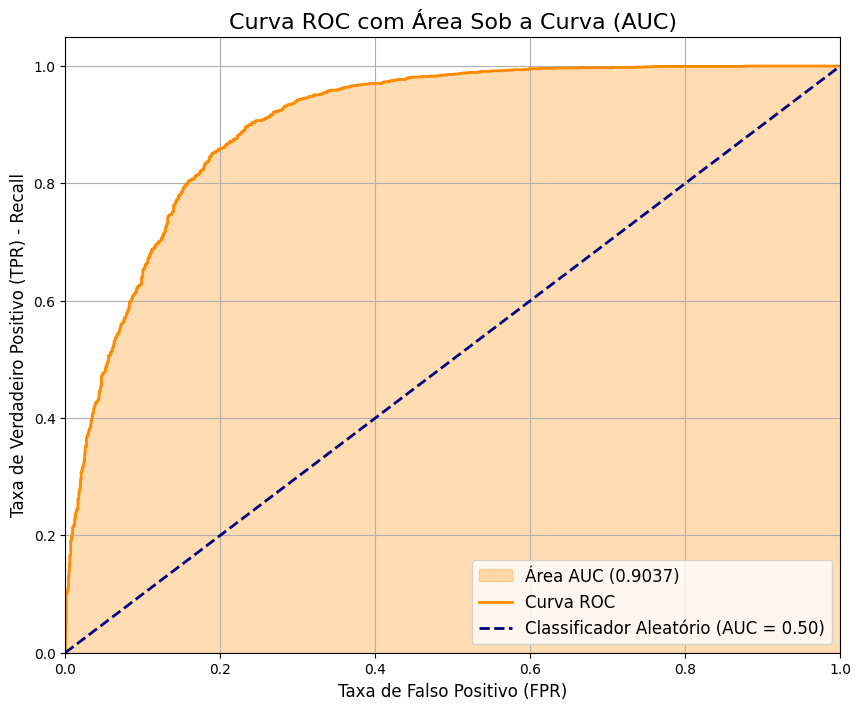

In [41]:
#Curva ROC com aréa preenchida (AUC)
plt.figure(figsize=(10, 8))

#Área sob a curva (AUC)
plt.fill_between(fpr, tpr, color='darkorange', alpha=0.3, label=f'Área AUC ({roc_auc:.4f})')

#Curva ROC
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC' )

#Linha Diagonal (Modelo Aleatório - Baseline)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Classificador Aleatório (AUC = 0.50)')

# 4. Configurações Finais
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo (FPR)', fontsize=12)
plt.ylabel('Taxa de Verdadeiro Positivo (TPR) - Recall', fontsize=12)
plt.title('Curva ROC com Área Sob a Curva (AUC)', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

#### Análise ROC:

Métrica Principal (AUC): O indicador mais importante no gráfico é a Área Sob a Curva (AUC), que é de 0.9037 (ou 90,37%).

Um AUC de 1.0 representa um modelo perfeito.

Um AUC de 0.50 (a linha tracejada azul) representa um "Classificador Aleatório", ou seja, um modelo que não tem capacidade alguma de distinção (equivale a "chutar").

Interpretação do Valor: Um valor de AUC de 0.9037 é considerado excelente. Isso significa que o modelo tem uma alta capacidade de distinguir corretamente entre as duas classes (por exemplo, "positivo" e "negativo").

Análise da Curva (Linha Laranja):

A "Curva ROC" (linha laranja) plota a Taxa de Verdadeiro Positivo (TPR) no eixo Y contra a Taxa de Falso Positivo (FPR) no eixo X.

O fato de a curva se "curvar" acentuadamente para o canto superior esquerdo (onde o TPR é alto e o FPR é baixo) é o comportamento ideal. Isso mostra que o modelo consegue identificar corretamente muitos positivos (alto TPR) sem classificar erroneamente muitos negativos como positivos (baixo FPR).

### Pipelines e Tunning

Vamos utlizar os métodos de Pipelines + RandomizedSearchCV para treinar o modelo escolhido (Gradient Boosting) e achar os melhores hiperparâmetros para o mesmo.

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

#Definindo o pipeline do modelo

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', GradientBoostingClassifier(random_state= 42))
    
])
    
#Definindo os parâmetros que quermos explorar
param_distribuitions = {
    'model__n_estimators' : [100,200,300],
    'model__max_depth' : [3,5],
    'model__learning_rate' : [0.1,0.05,0.01],
    'model__min_samples_leaf' : [1,3]
}

In [43]:
#Utilizando o RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator= pipeline,
    param_distributions= param_distribuitions,
    n_iter = 10,
    cv = 5,              #5 folds no cross validation
    scoring= 'f1',       #vamos focar o f1 score para métrica de tunning, para equilibrar a precisão e o recall.
    refit= 'f1',         #seleciona o melhor modelo com base no 'f1 score
    n_jobs = -1,
    verbose = 1,
    random_state= 42
      
)

#Treinando o modelo 
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'model__learning_rate': [0.1, 0.05, ...], 'model__max_depth': [3, 5], 'model__min_samples_leaf': [1, 3], 'model__n_estimators': [100, 200, ...]}"
,n_iter,10
,scoring,'f1'
,n_jobs,-1
,refit,'f1'
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


#### Analisando e definindo o modelo otimizado

In [44]:

#Definindo o melhor modelo e fazendo a predição 
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)

#Obtendo o score, hiperparametros e métricas do modelo
print(f'Score do modelo: {random_search.best_score_:.3f}')
print(f'Melhores hiperparametros para o modelo: {random_search.best_estimator_}')
print(f'{classification_report(y_test, y_pred)}')

Score do modelo: 0.841
Melhores hiperparametros para o modelo: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            min_samples_leaf=3,
                                            n_estimators=200,
                                            random_state=42))])
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1719
           1       0.80      0.89      0.84      1754

    accuracy                           0.83      3473
   macro avg       0.84      0.83      0.83      3473
weighted avg       0.84      0.83      0.83      3473



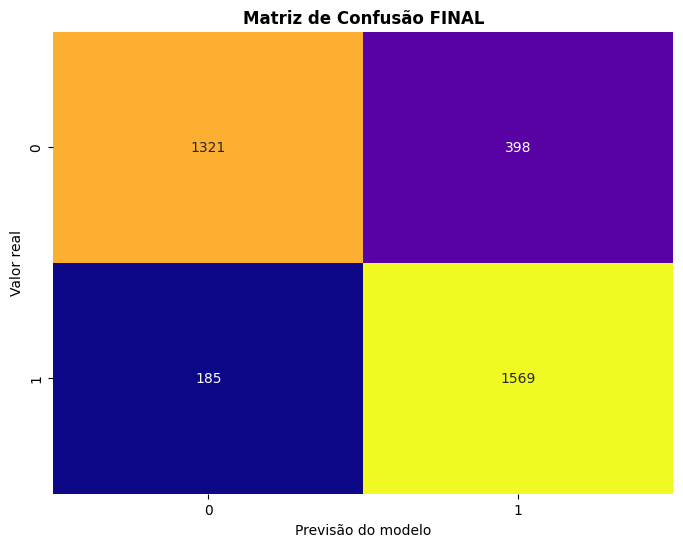

In [45]:
#Matriz de confusão final 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma', cbar=False)
plt.title('Matriz de Confusão FINAL', fontweight='bold')
plt.xlabel('Previsão do modelo')
plt.ylabel('Valor real')
plt.show()

#### Salvando em PKL

In [54]:

# Cria o diretório 'models' um nível acima
os.makedirs('../models', exist_ok=True)

#Salvando o pipeline treinado diretamente no caminho
joblib.dump(best_model, '../models/spotify_model_pipeline.pkl')



['../models/spotify_model_pipeline.pkl']


##  Avaliação Final do Projeto (Evaluation)

O objetivo central deste projeto foi desenvolver um modelo de classificação de alta performance para prever se uma música do Spotify se tornaria um "Hit" (1) ou "Flop" (0).

Após as etapas de limpeza, Análise Exploratória (EDA) e Engenharia de Features (onde `is_vocal_track` foi criada), um *benchmark* de 7 algoritmos de classificação foi executado. A Validação Cruzada (Cross-Validation) apontou o **Gradient Boosting** como o modelo campeão, apresentando a maior acurácia média (83.16%) e a maior estabilidade (menor desvio padrão).

Este modelo campeão foi então submetido a uma otimização de hiperparâmetros (Tuning) usando `RandomizedSearchCV`, com foco na métrica `f1-score`.

* O score do modelo na validação cruzada (CV F1-Score) foi de **0.841**.
* Os melhores hiperparâmetros encontrados foram: `learning_rate=0.05`, `n_estimators=200` e `min_samples_leaf=3`.


###  Análise dos Resultados Finais (no Conjunto de Teste)

O modelo final otimizado, usando o limiar padrão (0.5), foi aplicado ao conjunto de teste e alcançou uma **Acurácia total de 83%**.

#### Relatório de Classificação:

O desempenho detalhado do modelo é o seguinte:

* **Para "Hits" (Classe 1):**
    * **Recall: 89%**. Esta é a principal força do modelo. Ele é excepcional em "encontrar" os Hits, identificando corretamente 89% de todas as músicas que foram de fato um sucesso.
    * **Precisão: 80%**. Quando o modelo prevê que uma música será um "Hit", ele está correto 80% das vezes.
    * **F1-Score: 0.84**. Demonstra um excelente equilíbrio entre as duas métricas.

* **Para "Flops" (Classe 0):**
    * **Precisão: 88%**. O modelo é muito confiável ao identificar "Flops".
    * **Recall: 77%**.

#### Matriz de Confusão Final:

A matriz de confusão visualiza a contagem exata de acertos e erros:

* **Verdadeiros Positivos (Hits Corretos): 1569** (Amarelo)
* **Verdadeiros Negativos (Flops Corretos): 1321** (Laranja)
* **Falsos Negativos (Hits Perdidos): 185** (Azul-Escuro)
* **Falsos Positivos (Alarmes Falsos): 398** (Roxo)

###  Conclusão da Avaliação

O desempenho final do modelo **Gradient Boosting otimizado** é excelente e cumpre o objetivo do projeto. O F1-Score de 0.84 (para "Hits") e 0.82 (para "Flops") confirma que o modelo é robusto e muito equilibrado.

Sua maior virtude é o **Recall de 89%** para a classe de interesse ("Hit"). Isso se traduz em um resultado de negócio muito positivo: o modelo conseguiu identificar **1.569** sucessos reais e **deixou de identificar apenas 185**.